In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from enum import auto
#import graphviz
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler
#from datetime import datetime

# carregar dados
dados = pd.read_csv("https://cdn3.gnarususercontent.com.br/3677-data-science-regressao-linear/Projeto/Base%20de%20dados/Pre%C3%A7os_de_casas.csv")
dados = dados.drop(columns='Id')

#Correlação

corr = dados.corr()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_primeiro_andar             1438 non-null   float64
 1   existe_segundo_andar            1438 non-null   int64  
 2   area_segundo_andar              1438 non-null   float64
 3   quantidade_banheiros            1438 non-null   int64  
 4   capacidade_carros_garagem       1438 non-null   int64  
 5   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 6   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 78.8 KB


In [32]:
from sklearn.model_selection import train_test_split

y = dados['preco_de_venda']
x = dados.drop(columns='preco_de_venda')

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=764)

df_train = pd.DataFrame(x_treino, columns=x.columns)
df_train['preco_de_venda'] = y_treino

In [33]:
from statsmodels.formula.api import ols
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()
modelo_0.params

,0
Intercept,144257.370676
area_primeiro_andar,6950.925983


In [35]:

print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     595.8
Date:                Sat, 23 Aug 2025   Prob (F-statistic):          1.11e-103
Time:                        20:00:58   Log-Likelihood:                -14121.
No. Observations:                1006   AIC:                         2.825e+04
Df Residuals:                    1004   BIC:                         2.826e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.443e+05   3

Text(0, 0.5, 'Preco de venda')

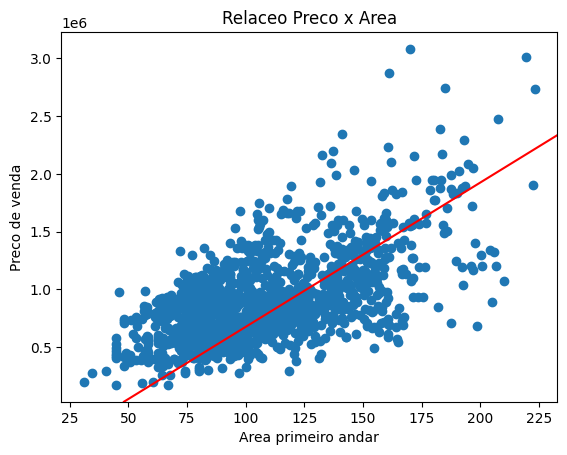

In [24]:
# relacao entre area construida e preco
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66,250000), xy2=(190,1800000), color='red')
plt.title('Relaceo Preco x Area')
plt.xlabel('Area primeiro andar')
plt.ylabel('Preco de venda')

In [27]:
px.scatter(dados, x='area_primeiro_andar', y='preco_de_venda', trendline_color_override="red",trendline='ols')

Text(108.0815972222222, 0.5, 'Preco de venda')

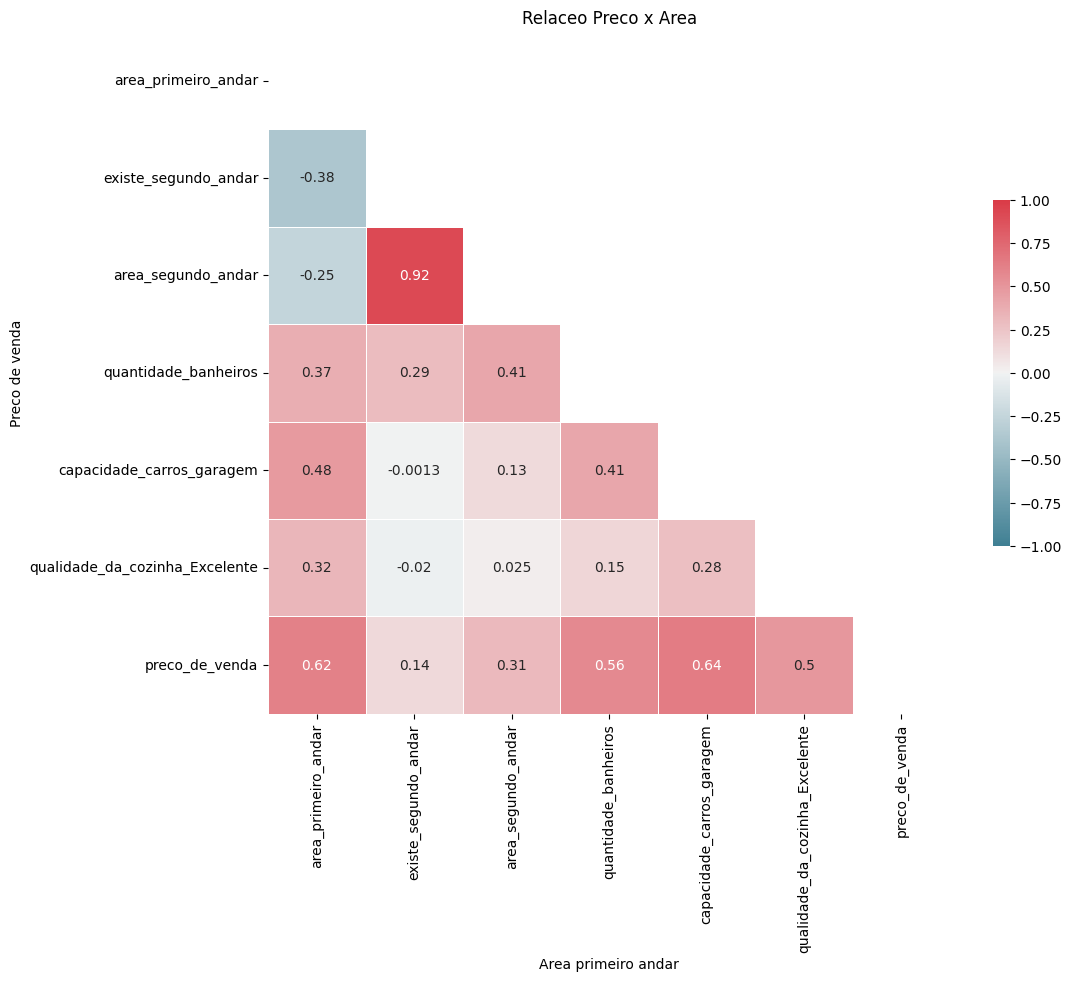

In [16]:
# Quais fatores estão mais correlacionados

# Gerar uma mascara para triangulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar mapa de cores
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1,vmin=-1,center=0,square=True, linewidths=.5,annot=True,cbar_kws={"shrink": .5})

#exibe mapa de calor
plt.show()